# Multilabel classification

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
vector_images, labels = mnist["data"].values, mnist["target"].values # convert from pandas to numpy
labels = labels.astype(int)

## Prepare the train dataset

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3 #30% of the dataset

vector_images_train, vector_images_test, labels_train, labels_test = train_test_split(vector_images, labels, test_size=TEST_SIZE)

(21000, 784)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

labels_train_large = (labels_train >= 7) # True if the number is large (7, 8, 9)
labels_train_odd = (labels_train % 2 == 1)
multilabel_train = np.c_[labels_train_large, labels_train_odd] # Combine the two labels into a single array

knn_clf = KNeighborsClassifier()
knn_clf.fit(vector_images_train, multilabel_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Is the number large? False
Is the number odd? True


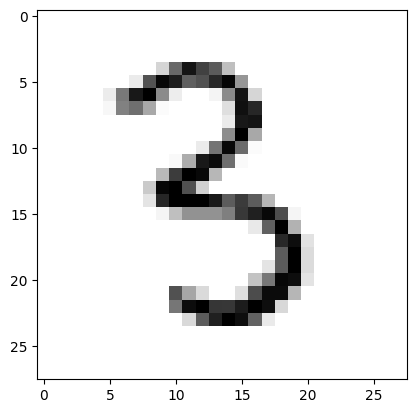

In [17]:
import matplotlib.pyplot as plt

n = 3

digit = vector_images_train[n]

plt.imshow(digit.reshape(28, 28), cmap="binary")
prediction = knn_clf.predict([digit])[0].tolist()

print(f"Is the number large? {prediction[0]}")
print(f"Is the number odd? {prediction[1]}")